Model Training

In [40]:
#import required packages 

#basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import xgboost
import catboost


In [41]:
#import the csv file as pandas dataframe
df = pd.read_csv('data/stud.csv')

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
#Preparing X and y variables
X = df.drop(columns='math score', axis=1)
y = df['math score']

In [44]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_tranformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_tranformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [45]:
X = preprocessor.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create evaluation function to give metrics after model training

In [47]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decesion Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": xgboost.XGBRegressor(),
    "CatBoosting Regressor": catboost.CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)  

   # print(model)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    r2_list.append(model_test_r2)

    print("Model Performance of the Training set")
    print(f"- Root Mean Squared Error: ", model_train_rmse)
    print(f"- Mean Absoulute Error: ", model_train_mae)
    print(f"- R2 score: ", model_train_r2)

    print("---------------------------------------------------------")

    print("Model Performance of the Test set")
    print(f"- Root Mean Squared Error: ", model_test_rmse)
    print(f"- Mean Absoulute Error: ", model_test_mae)
    print(f"- R2 score: ", model_test_r2)

    print("\n")




Linear Regression
Model Performance of the Training set
- Root Mean Squared Error:  5.323050852720514
- Mean Absoulute Error:  4.266711846071957
- R2 score:  0.8743172040139593
---------------------------------------------------------
Model Performance of the Test set
- Root Mean Squared Error:  5.393993869732845
- Mean Absoulute Error:  4.214763142474852
- R2 score:  0.8804332983749564


Lasso
Model Performance of the Training set
- Root Mean Squared Error:  6.593815587795566
- Mean Absoulute Error:  5.206302661246526
- R2 score:  0.8071462015863456
---------------------------------------------------------
Model Performance of the Test set
- Root Mean Squared Error:  6.519694535667421
- Mean Absoulute Error:  5.157881810347763
- R2 score:  0.8253197323627852


Ridge
Model Performance of the Training set
- Root Mean Squared Error:  5.323324922741654
- Mean Absoulute Error:  4.264987823725982
- R2 score:  0.8743042615212909
---------------------------------------------------------
Model

Results

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851361
8,AdaBoost Regressor,0.848042
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decesion Tree,0.749197


Linear Regression

In [50]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_predict = lin_model.predict(X_test)
score = r2_score(y_test, y_predict)
print(f"Accuracy of the model is {score *100:.2f}%")

Accuracy of the model is 88.04%


Plot y_pred and y_test

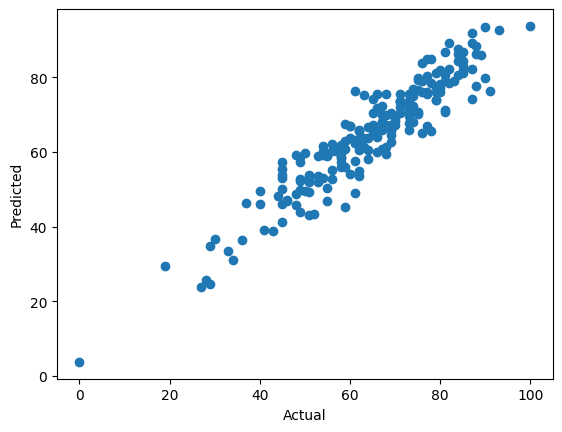

In [52]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<Axes: xlabel='math score'>

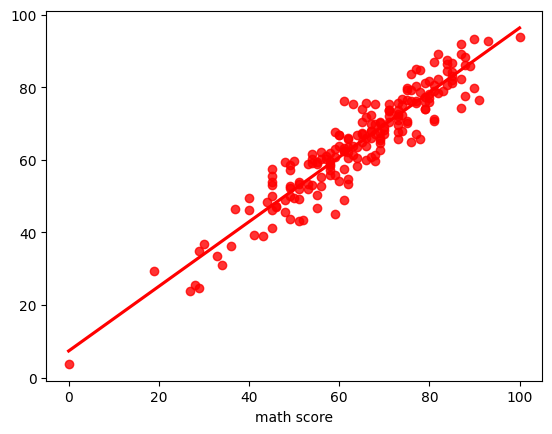

In [53]:
sns.regplot(x=y_test, y=y_predict, ci=None, color='red')

Difference between Actual and Predicted Values

In [54]:
pred_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_predict, 'Difference': y_test-y_predict})
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
